In [697]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 99)


## import data

In [698]:
df_sep = pd.read_csv('listings_sep.csv')
df_jun = pd.read_csv('listings_jun.csv')
df = pd.concat([df_sep, df_jun]).set_index('id')

## data structure insight

In [699]:
df.shape

(191346, 74)

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191346 entries, 3109 to 1174660907684711616
Data columns (total 74 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   listing_url                                   191346 non-null  object 
 1   scrape_id                                     191346 non-null  int64  
 2   last_scraped                                  191346 non-null  object 
 3   source                                        191346 non-null  object 
 4   name                                          191346 non-null  object 
 5   description                                   182885 non-null  object 
 6   neighborhood_overview                         97536 non-null   object 
 7   picture_url                                   191342 non-null  object 
 8   host_id                                       191346 non-null  int64  
 9   host_url                             

In [701]:
df.describe()

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.913460e+05,1.913460e+05,191332.000000,191332.000000,0.0,191346.000000,191346.000000,191346.000000,138809.000000,177774.000000,138556.000000,191346.000000,1.913460e+05,191346.000000,191346.000000,1.913460e+05,1.913460e+05,191346.000000,1.913460e+05,0.0,191346.000000,191346.000000,191346.000000,191346.000000,191346.000000,191346.000000,191346.00000,132016.000000,131890.000000,131896.000000,131875.000000,131893.000000,131878.000000,131874.000000,191346.000000,191346.000000,191346.000000,191346.000000,132016.000000
mean,2.024076e+13,1.773642e+08,30.940998,38.439503,NaN,48.864113,2.342944,3.252422,1.200243,1.343841,1.668618,40.437981,2.303879e+04,39.271571,44.306309,2.306075e+04,1.128886e+05,40.682893,1.003618e+05,NaN,8.165977,21.132002,34.763768,127.114886,20.416570,5.575967,0.47863,4.721110,4.771140,4.653389,4.805331,4.828700,4.815336,4.626646,22.791958,21.933424,0.780685,0.017157,1.106160
std,1.479152e+08,1.962379e+08,125.594625,157.204528,NaN,0.018377,0.034618,1.662626,0.551445,0.914085,1.238950,106.491059,6.942863e+06,105.622139,111.052096,6.942863e+06,1.552425e+07,106.036588,1.420229e+07,NaN,10.371337,21.126075,32.716186,125.373376,52.665739,11.878477,1.18887,0.398037,0.375664,0.453939,0.369579,0.355887,0.314643,0.437635,88.746282,87.842428,8.536934,0.310828,1.360663
min,2.024061e+13,2.626000e+03,0.000000,0.000000,NaN,48.816080,2.227178,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.024061e+13,1.934268e+07,1.000000,1.000000,NaN,48.850450,2.320350,2.000000,1.000000,1.000000,1.000000,2.000000,4.500000e+01,1.000000,2.000000,3.325000e+01,6.200000e+01,2.000000,6.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.610000,4.700000,4.500000,4.760000,4.800000,4.750000,4.500000,1.000000,1.000000,0.000000,0.000000,0.220000
50%,2.024061e+13,7.074008e+07,1.000000,2.000000,NaN,48.865410,2.346680,3.000000,1.000000,1.000000,1.000000,3.000000,3.650000e+02,2.000000,3.000000,3.650000e+02,3.650000e+02,3.000000,3.650000e+02,NaN,2.000000,16.000000,29.000000,86.000000,4.000000,1.000000,0.00000,4.830000,4.890000,4.790000,4.920000,4.960000,4.920000,4.720000,1.000000,1.000000,0.000000,0.000000,0.660000
75%,2.024091e+13,3.311521e+08,3.000000,5.000000,NaN,48.879230,2.368740,4.000000,1.000000,2.000000,2.000000,5.000000,1.125000e+03,5.000000,6.000000,1.125000e+03,1.125000e+03,5.000000,1.125000e+03,NaN,15.000000,39.000000,65.000000,245.000000,18.000000,6.000000,0.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.910000,2.000000,2.000000,0.000000,0.000000,1.500000
max,2.024091e+13,5.995743e+08,7397.000000,7754.000000,NaN,48.901670,2.468360,16.000000,42.000000,41.000000,30.000000,1000.000000,2.147484e+09,1000.000000,1000.000000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,3295.000000,814.000000,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,781.000000,781.000000,171.000000,11.000000,43.720000


## data reduction

In [702]:
df.describe(include=['O'])

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,191346,191346,191346,191346,182885,97536,191342,191346,191332,191332,152328,82093,112322,112322,130451,188970,191332,191332,66879,191332,191332,191332,97536,191346,191346,191346,191159,191346,138809,181593,191346,132016,132016,152052,191346
unique,105767,10,2,101158,102561,45636,110417,77876,13458,5190,2357,27351,4,98,101,2,74941,74941,378,8,2,2,1,20,72,4,42,166229,1833,2,10,4408,3292,72539,2
top,https://www.airbnb.com/rooms/3109,2024-06-13,city scrape,Appartement,"Simplify your life in this peaceful, central s...",The 18th arrondissement is in the north of Par...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/314994947,Checkmyguest,2019-12-06,"Paris, France","We’re Blueground, a global proptech company wi...",within an hour,100%,100%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Le Marais,"['email', 'phone']",t,t,Neighborhood highlights,Buttes-Montmartre,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Kitchen"", ""TV"", ""Wash...",$150.00,t,2024-06-13,2024-05-12,2024-08-11,"Available with a mobility lease only (""bail mo...",f
freq,2,44985,138849,259,212,392,14,1511,2662,1543,131683,1511,70706,83324,48396,158953,7502,7502,5953,156465,183830,172553,97536,21087,160692,171001,142416,510,3993,180640,44982,609,2333,13835,145624


In [703]:
df = df.drop(columns=['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood', 'neighbourhood_cleansed', 'amenities', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'host_neighbourhood'])

In [704]:
df.describe(include=['number'])

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.913460e+05,1.913460e+05,191332.000000,191332.000000,0.0,191346.000000,191346.000000,191346.000000,138809.000000,177774.000000,138556.000000,191346.000000,1.913460e+05,191346.000000,191346.000000,1.913460e+05,1.913460e+05,191346.000000,1.913460e+05,0.0,191346.000000,191346.000000,191346.000000,191346.000000,191346.000000,191346.000000,191346.00000,132016.000000,131890.000000,131896.000000,131875.000000,131893.000000,131878.000000,131874.000000,191346.000000,191346.000000,191346.000000,191346.000000,132016.000000
mean,2.024076e+13,1.773642e+08,30.940998,38.439503,NaN,48.864113,2.342944,3.252422,1.200243,1.343841,1.668618,40.437981,2.303879e+04,39.271571,44.306309,2.306075e+04,1.128886e+05,40.682893,1.003618e+05,NaN,8.165977,21.132002,34.763768,127.114886,20.416570,5.575967,0.47863,4.721110,4.771140,4.653389,4.805331,4.828700,4.815336,4.626646,22.791958,21.933424,0.780685,0.017157,1.106160
std,1.479152e+08,1.962379e+08,125.594625,157.204528,NaN,0.018377,0.034618,1.662626,0.551445,0.914085,1.238950,106.491059,6.942863e+06,105.622139,111.052096,6.942863e+06,1.552425e+07,106.036588,1.420229e+07,NaN,10.371337,21.126075,32.716186,125.373376,52.665739,11.878477,1.18887,0.398037,0.375664,0.453939,0.369579,0.355887,0.314643,0.437635,88.746282,87.842428,8.536934,0.310828,1.360663
min,2.024061e+13,2.626000e+03,0.000000,0.000000,NaN,48.816080,2.227178,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.024061e+13,1.934268e+07,1.000000,1.000000,NaN,48.850450,2.320350,2.000000,1.000000,1.000000,1.000000,2.000000,4.500000e+01,1.000000,2.000000,3.325000e+01,6.200000e+01,2.000000,6.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.610000,4.700000,4.500000,4.760000,4.800000,4.750000,4.500000,1.000000,1.000000,0.000000,0.000000,0.220000
50%,2.024061e+13,7.074008e+07,1.000000,2.000000,NaN,48.865410,2.346680,3.000000,1.000000,1.000000,1.000000,3.000000,3.650000e+02,2.000000,3.000000,3.650000e+02,3.650000e+02,3.000000,3.650000e+02,NaN,2.000000,16.000000,29.000000,86.000000,4.000000,1.000000,0.00000,4.830000,4.890000,4.790000,4.920000,4.960000,4.920000,4.720000,1.000000,1.000000,0.000000,0.000000,0.660000
75%,2.024091e+13,3.311521e+08,3.000000,5.000000,NaN,48.879230,2.368740,4.000000,1.000000,2.000000,2.000000,5.000000,1.125000e+03,5.000000,6.000000,1.125000e+03,1.125000e+03,5.000000,1.125000e+03,NaN,15.000000,39.000000,65.000000,245.000000,18.000000,6.000000,0.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.910000,2.000000,2.000000,0.000000,0.000000,1.500000
max,2.024091e+13,5.995743e+08,7397.000000,7754.000000,NaN,48.901670,2.468360,16.000000,42.000000,41.000000,30.000000,1000.000000,2.147484e+09,1000.000000,1000.000000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,3295.000000,814.000000,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,781.000000,781.000000,171.000000,11.000000,43.720000


In [705]:
df = df.drop(columns=['host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'maximum_nights', 'minimum_nights', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'])

In [706]:
df.shape

(191346, 25)

## data cleaning

In [707]:
# remove all records without price
df = df.loc[~df['price'].isnull()]

In [708]:
# missing data rate per column
(df.isna().mean())[(df.isna().mean()) > 0].sort_values(ascending=False) * 100

review_scores_checkin          31.860326
review_scores_value            31.860326
review_scores_location         31.858885
review_scores_accuracy         31.856724
review_scores_communication    31.856004
review_scores_cleanliness      31.854563
review_scores_rating           31.780360
reviews_per_month              31.780360
host_acceptance_rate           19.510983
host_is_superhost               1.370949
beds                            0.211081
bedrooms                        0.176502
bathrooms_text                  0.103019
bathrooms                       0.028817
dtype: float64

In [709]:
# all the columns with 31% missing data
review_columns = ['review_scores_checkin', 'review_scores_value', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_rating', 'reviews_per_month']

df[review_columns] = df[review_columns].fillna(df[review_columns].mean())

In [710]:
# integer columns filling
int_columns = ['beds', 'bedrooms', 'bathrooms']

df[int_columns] = df[int_columns].fillna(df[int_columns].median())

In [711]:
(df.isna().sum() / len(df))[(df.isna().sum() / len(df)) > 0].sort_values(ascending=False)

host_acceptance_rate    0.195110
host_is_superhost       0.013709
bathrooms_text          0.001030
dtype: float64

In [712]:
# clean boolean data and fill missing data
bool_columns = ['host_is_superhost', 'instant_bookable']

for column in bool_columns:
  df[column] = df[column].apply(lambda value: value == 't')

In [713]:
df['bathrooms_text'].unique()

array(['1 bath', '1.5 baths', nan, '2.5 baths', '2 baths',
       '1 shared bath', '1 private bath', '2 shared baths', '3.5 baths',
       '4.5 baths', '3 baths', '1.5 shared baths', '4 baths', '0 baths',
       'Private half-bath', 'Shared half-bath', 'Half-bath', '5 baths',
       '6 baths', '2.5 shared baths', '0 shared baths', '7 baths',
       '5.5 baths', '6.5 baths', '3 shared baths', '7.5 baths',
       '10 shared baths', '3.5 shared baths', '8 baths', '8.5 baths',
       '5 shared baths', '4 shared baths', '20 baths', '42 baths',
       '6 shared baths', '11 baths', '7 shared baths', '30 shared baths',
       '16 baths', '5.5 shared baths', '30 baths', '10 baths'],
      dtype=object)

In [714]:
# extract info from bathrooms_text
df['bathrooms_is_shared'] = df['bathrooms_text'].fillna('').apply(lambda value: 'shared' in value)
df = df.drop(columns=['bathrooms_text'])

In [715]:
# convert string to float
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100

In [716]:
# fill missing data of host_acceptance_rate
df.loc[df['host_acceptance_rate'].isnull(), 'host_acceptance_rate'] = df['host_acceptance_rate'].mean()

In [717]:
# host_since(transform to number of days since)
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since'] = (df['host_since'].max() - df['host_since']).dt.days

In [718]:
# label encode nominal data
le = LabelEncoder()

df['property_type'] = le.fit_transform(df['property_type'])
df['room_type'] = le.fit_transform(df['room_type'])

In [719]:
# trunc scrape id to the yyyymm
df['scrape_id'] = df['scrape_id'].astype(str).str[:6].astype(int)

In [720]:
# amputate outliers based on price
df = df.loc[(df['price'] != 0) & (df['price'] < 5000)]

## train model

In [721]:
# normalize the data
nrml = MinMaxScaler()
excluded_columns = ['price', 'scrape_id', 'host_is_superhost', 'property_type', 'room_type', 'instant_bookable', 'bathrooms_is_shared']
columns_to_scale = [col for col in df.columns if col not in excluded_columns]
df[columns_to_scale] = nrml.fit_transform(df[columns_to_scale])

X = df.loc[:,df.columns != 'price'].values

y = np.log1p(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [722]:
df

,scrape_id,host_since,host_acceptance_rate,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,bathrooms_is_shared
id,,,,,,,,,,,,,,,,,,,,,,,,,
3109,202409,0.992304,0.670000,False,0.185125,0.379474,15,0,0.066667,0.023810,0.026316,0.033333,113.0,0.001214,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,True,0.000000,0.000915,False
5396,202409,0.971267,0.940000,False,0.425564,0.543872,15,0,0.066667,0.023810,0.000000,0.033333,95.0,0.125341,0.922000,0.928000,0.918000,0.96200,0.968000,0.992000,0.91800,False,0.000000,0.050789,False
7397,202409,1.000000,0.670000,True,0.502982,0.522312,15,0,0.200000,0.023810,0.052632,0.033333,145.0,0.109256,0.946000,0.962000,0.890000,0.98400,0.978000,0.986000,0.94800,False,0.000000,0.050103,False
241715,202409,0.751496,0.811903,False,0.904968,0.626758,15,0,0.333333,0.023810,0.078947,0.000000,450.0,0.000000,0.944662,0.952921,0.933813,0.96053,0.964528,0.964629,0.92307,False,0.000000,0.030651,False
9359,202409,0.943048,0.811903,False,0.514326,0.503571,15,0,0.000000,0.023810,0.026316,0.033333,75.0,0.000000,0.944662,0.952921,0.933813,0.96053,0.964528,0.964629,0.92307,False,0.000000,0.030651,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174616011019971635,202406,0.640499,0.350000,False,0.818735,0.268977,15,0,0.066667,0.035714,0.026316,0.033333,100.0,0.000000,0.944662,0.952921,0.933813,0.96053,0.964528,0.964629,0.92307,False,0.000000,0.030651,False
1174643249695963484,202406,0.454763,1.000000,False,0.485762,0.528689,15,0,0.066667,0.035714,0.026316,0.033333,118.0,0.000000,0.944662,0.952921,0.933813,0.96053,0.964528,0.964629,0.92307,True,0.028205,0.030651,False
1174648872732919363,202406,0.014708,0.811903,False,0.422204,0.355202,8,0,0.066667,0.023810,0.026316,0.033333,130.0,0.000000,0.944662,0.952921,0.933813,0.96053,0.964528,0.964629,0.92307,False,0.000000,0.030651,False


### RandomForestRegressor

In [723]:
model = RandomForestRegressor(n_estimators=200)

In [724]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [725]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7216889737213067

In [726]:
np.expm1(y_test).sort_values(ascending=False)

id
52493875               4900.0
20471159               4500.0
1061696648039568575    4300.0
1039782814009622610    4300.0
927402427009822574     4047.0
                        ...  
43852115                 20.0
46133956                 20.0
1033179024749005331      19.0
1158065479055922076      16.0
1087465671624422127      10.0
Name: price, Length: 13845, dtype: float64

### GradientBoostingRegressor

In [727]:
model2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
model2.score(X_test, y_test)

0.6691095675326533

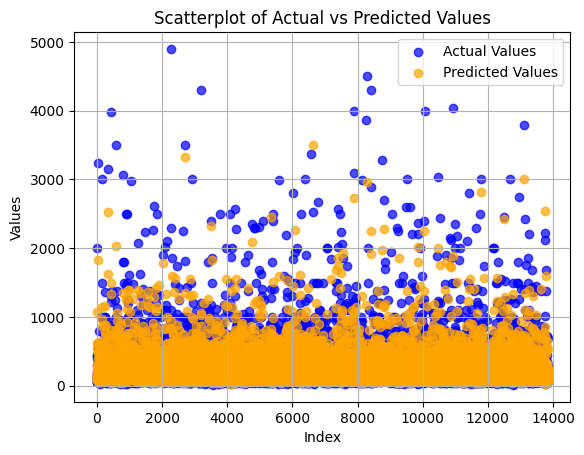

In [728]:
plt.scatter(range(len(np.expm1(y_test))), np.expm1(y_test), color='blue', label='Actual Values', alpha=0.7)
plt.scatter(range(len(np.expm1(y_pred))), np.expm1(y_pred), color='orange', label='Predicted Values', alpha=0.7)

plt.title('Scatterplot of Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
